In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

In [43]:
data1 = pd.read_csv("datasets/pulsar/pulsar_stars.csv", dtype=np.float32)
Y1 = np.array(data1.pop("target_class"))
X1 = np.array(data1)

data2 = pd.read_csv("datasets/mobile/train.csv")
Y2 = np.array(data2.pop("price_range"))
X2 = np.array(data2.copy())

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

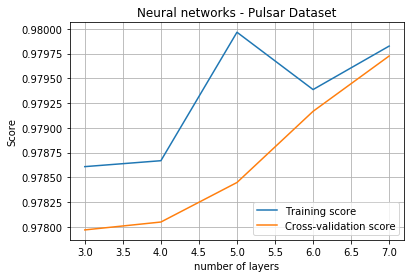

In [45]:
seed = 0
n_cv = 5
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed)
hidden_layers = [(100,75,50), (100,75,75,50),(100,75,75,50,50),(100,75,75,50,50,25),(100,75,75,50,50,25,25)]
train_scores, test_scores = validation_curve(nn, x_train_norm, y_train, param_name="hidden_layer_sizes", param_range=hidden_layers, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(range(3,len(hidden_layers)+3), np.mean(train_scores, axis=1), label='Training score')
plt.plot(range(3,len(hidden_layers)+3), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Neural networks - Pulsar Dataset')
plt.xlabel('number of layers')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters for Neural Network:
{'hidden_layer_sizes': (100, 75, 75, 50, 50)}
Accuracy score of Neural network with best parameters is 98.04%
ROC score of Neural Network with best parameters is 92.98%
F1 score of Neural Network with best parameters is 89.05%


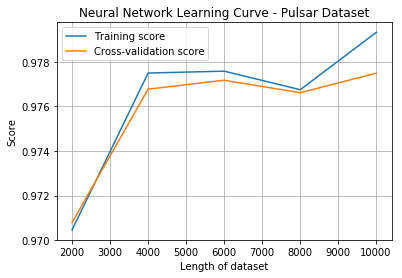

In [46]:
parameters = {'hidden_layer_sizes' : hidden_layers}
nn = MLPClassifier(max_iter=2000 ,early_stopping=True)
clf = GridSearchCV(nn, param_grid=parameters, cv=n_cv, n_jobs=-1)
clf.fit(x_train_norm, y_train)

print("Best parameters for Neural Network:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Neural network with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of Neural Network with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of Neural Network with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed
                   ,hidden_layer_sizes = clf.best_params_['hidden_layer_sizes'])
train_sizes, train_scores, test_scores = learning_curve(nn, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Neural Network Learning Curve - Pulsar Dataset")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Text(0.5, 0, 'False Positive Rate')

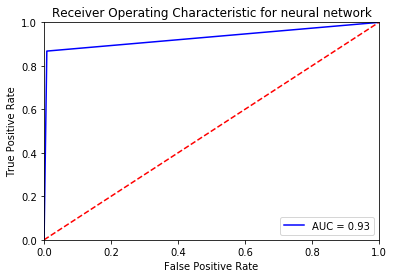

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for neural network')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [51]:
#Mobile dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# x_train_norm = X_train
# x_test_norm = X_test
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

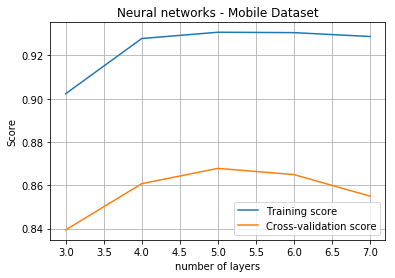

In [49]:
seed = 0
n_cv = 5
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed)
hidden_layers = [(100,75,50), (100,75,75,50),(100,75,75,50,50),(100,75,75,50,50,25),(100,75,75,50,50,25,25)]
train_scores, test_scores = validation_curve(nn, x_train_norm, y_train, param_name="hidden_layer_sizes", param_range=hidden_layers, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(range(3,len(hidden_layers)+3), np.mean(train_scores, axis=1), label='Training score')
plt.plot(range(3,len(hidden_layers)+3), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Neural networks - Mobile Dataset')
plt.xlabel('number of layers')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


Best parameters for Neural Network:
{'hidden_layer_sizes': (100, 75, 75, 50)}
Accuracy score of Neural network with best parameters is 85.83%


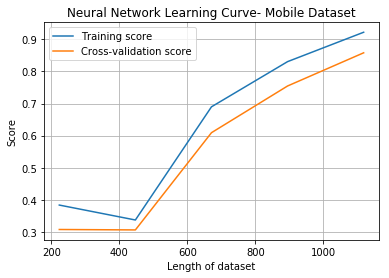

In [50]:
parameters = {'hidden_layer_sizes' : hidden_layers}
nn = MLPClassifier(max_iter=2000 ,early_stopping=True)
clf = GridSearchCV(nn, param_grid=parameters, cv=n_cv, n_jobs=-1)
clf.fit(x_train_norm, y_train)

print("Best parameters for Neural Network:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Neural network with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed
                   ,hidden_layer_sizes = clf.best_params_['hidden_layer_sizes'])
train_sizes, train_scores, test_scores = learning_curve(nn, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Neural Network Learning Curve- Mobile Dataset")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix, without normalization
[[133  13   0   0]
 [ 13 104  19   0]
 [  0  13 135  14]
 [  0   0  13 143]]


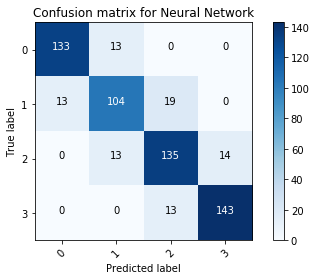

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix for Neural Network')
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed
                   ,hidden_layer_sizes = [100, 75, 75, 50, 50])
%timeit nn.fit(x_train_norm, y_train)

%timeit nn.predict(x_train_norm)


551 ms ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.1 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
nn = MLPClassifier(max_iter=2000,early_stopping=True,learning_rate='adaptive',random_state=seed
                   ,hidden_layer_sizes = [100, 75, 75, 50, 50])
%timeit nn.fit(x_train_norm, y_train)

%timeit nn.predict(x_train_norm)


194 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.13 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
